In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio.v3
import time
import cv2
import csv
from numpy import linalg 
from PIL import Image 
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio.v3 as iio
from skimage import filters
from skimage.color import rgb2gray          
from skimage.measure import regionprops
from skimage.transform import rescale, resize, downscale_local_mean

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Set global parameters
mpl.rcParams['font.size'] = 14  # Set global font size for titles, labels, etc.
mpl.rcParams['axes.titlesize'] = 14  # Title size
mpl.rcParams['axes.labelsize'] = 14  # X and Y label size
mpl.rcParams['legend.fontsize'] = 14  # Legend font size
mpl.rcParams['xtick.labelsize'] = 14  # X-tick label size
mpl.rcParams['ytick.labelsize'] = 14  # Y-tick label size
mpl.rcParams['font.family'] = 'Arial'  # Set font family globally
# Set font weight for axis labels to bold
#mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'  # Title weight (bold)

# 1. Stability Analysis

MSE zwischen Bild 4 und Bild 4: 0.0000000000
MSE zwischen Bild 4 und Bild 5: 0.0000435257
MSE zwischen Bild 4 und Bild 6: 0.0000508528
MSE zwischen Bild 4 und Bild 7: 0.0000575913
MSE zwischen Bild 4 und Bild 8: 0.0000530426
MSE zwischen Bild 4 und Bild 9: 0.0000759408
MSE zwischen Bild 4 und Bild 10: 0.0000832819
MSE zwischen Bild 4 und Bild 11: 0.0000667618
MSE zwischen Bild 4 und Bild 12: 0.0000808067
MSE zwischen Bild 4 und Bild 13: 0.0000924656
MSE zwischen Bild 4 und Bild 14: 0.0000881253
MSE zwischen Bild 4 und Bild 15: 0.0000832960
MSE zwischen Bild 4 und Bild 16: 0.0000762881
MSE zwischen Bild 4 und Bild 17: 0.0000903095
MSE zwischen Bild 4 und Bild 18: 0.0000969288
MSE zwischen Bild 4 und Bild 19: 0.0001248693
MSE zwischen Bild 4 und Bild 20: 0.0001009340
MSE zwischen Bild 4 und Bild 21: 0.0001016229
MSE zwischen Bild 4 und Bild 22: 0.0001246544
MSE zwischen Bild 4 und Bild 23: 0.0001199931
MSE zwischen Bild 4 und Bild 24: 0.0001167923
MSE zwischen Bild 4 und Bild 25: 0.00013

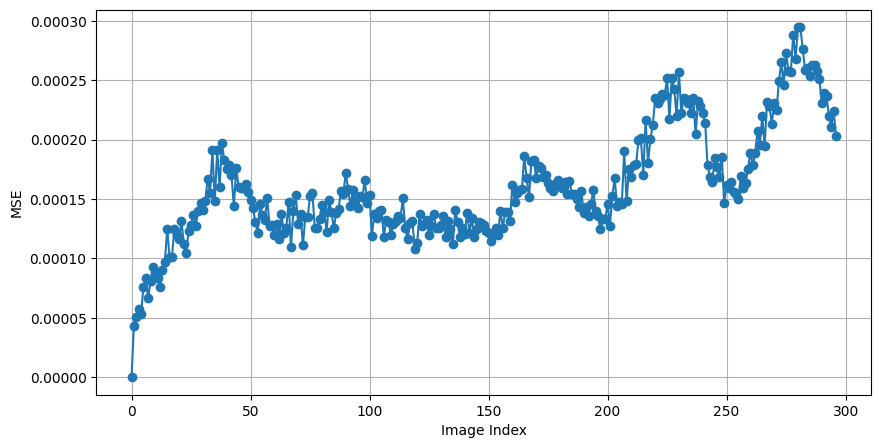

In [41]:
def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".bmp") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = img /255 # new
                images.append(img)
    return images

def compare_images(images, start_index):
    mse_values = []
    for i in range(start_index, len(images)):
        mse = calculate_mse(images[start_index], images[i])
        mse_values.append(mse)
        print(f"MSE zwischen Bild {start_index+1} und Bild {i+1}: {mse:.10f}")
    return mse_values

# Pfad zum Ordner mit den Bildern angeben

#folder_path = r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_1_cropped'
folder_path = r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_2_cropped'


loaded_images = load_images_from_folder(folder_path)

# Bilder vergleichen und MSE berechnen
mse_values = compare_images(loaded_images, start_index=3)



# Varianz und Standardabweichung berechnen
variance = np.var(mse_values)
std_dev = np.std(mse_values)
print(f"Varianz der MSE-Werte: {variance:.10f}")
print(f"Standardabweichung der MSE-Werte: {std_dev:.10f}")

# Grafik erstellen
plt.figure(figsize=(10, 5))
plt.plot(mse_values, marker='o')
plt.xlabel('Image Index')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

## Differenz between two images same Phasemask

In [52]:
# Vortex Fokus
# image_path_1 = r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_1_cropped\2024-04-22 18-01-44.png'
# image_path_2 = r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_1_cropped\2024-04-22 18-02-20.png'

#Fortex Defokus
image_path_1 = r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_2_cropped\2024-04-22 18-01-57.png'
image_path_2 =  r'D:\Masterarbeit\Stability_Analysis\Stability_Analysis_Vortex_Phasemask_1\camera_2_cropped\2024-04-22 18-39-42.png'

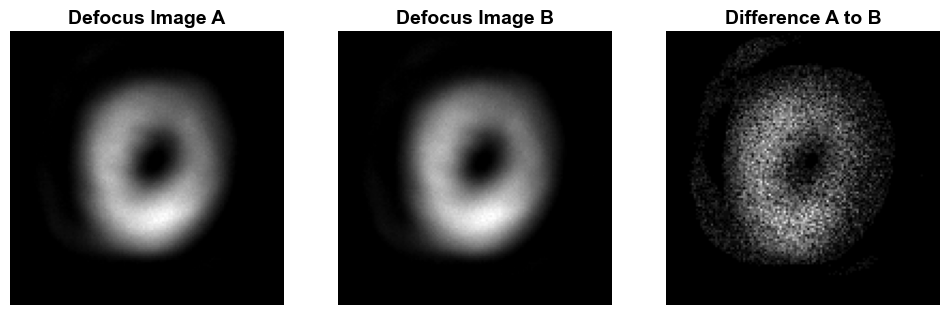

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

image_diff = cv2.absdiff(image1, image2)


fig, axs = plt.subplots(1, 3, figsize=(12, 4))


axs[0].imshow(image1, cmap='gray')
axs[0].set_title("Defocus Image A")
axs[0].axis('off')

axs[1].imshow(image2, cmap='gray')
axs[1].set_title("Defocus Image B")
axs[1].axis('off')


axs[2].imshow(image_diff, cmap='gray')
axs[2].set_title("Difference A to B")
axs[2].axis('off')

plt.show()

# Noise Simulation

## Make Noise visble Lab noise

MSE: 161.49099731445312
MAE: 1.2096672058105469


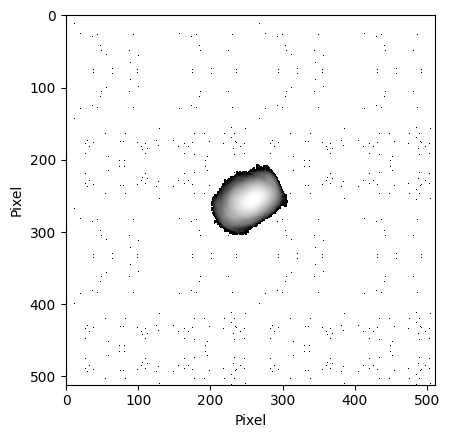

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

width = 512 #[256]
height = 512 #[256]

def calculate_metrics(img1, img2):
    arr1 = np.array(img1, dtype=np.float32)
    arr2 = np.array(img2, dtype=np.float32)
    
    diff = np.abs(arr1 - arr2)
    
    mse = np.mean((arr1 - arr2) ** 2)
    mae = np.mean(np.abs(arr1 - arr2))
    
    return diff, mse, mae

def create_difference_image(diff):
    norm_diff = np.clip(diff, 0, np.max(diff))  
    plt.imshow(norm_diff, cmap='gray', norm=LogNorm())
    plt.xlabel("Pixel")
    plt.ylabel("Pixel")
    plt.show()

# Real images noise LAP
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_1_v3_crop_512\1_idx_2024-04-04 14-02-06.png' # mit Laser cropped focus
image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_2_v3_crop_512\1_idx_2024-04-04 14-02-18.png' # mit Laser cropped defocus

# noise
#image_path1 =r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_014\test\beam_nf\idx-17001__img-17182.png'





img1 = Image.open(image_path1).convert('L')
img2 = np.zeros((width, height), dtype=np.uint8)

diff, mse, mae = calculate_metrics(img1, img2)
print(f"MSE: {mse}")
print(f"MAE: {mae}")

create_difference_image(diff)

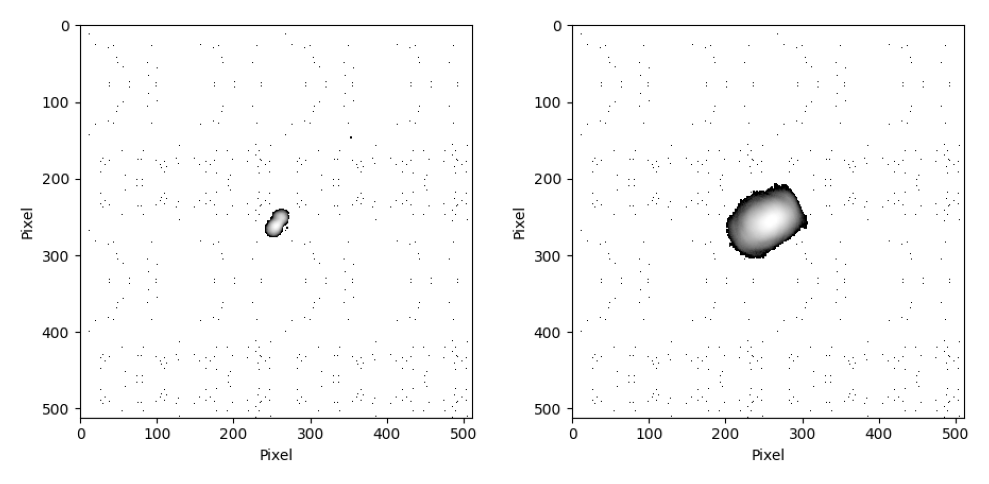

In [22]:
import cv2
import matplotlib.pyplot as plt

# Bildpfade
img_path_1 = r'D:\Masterarbeit\Noise_Analyse\Labor\Noise_Focus_Labor_Ditzingen.png'
img_path_2 = r'D:\Masterarbeit\Noise_Analyse\Labor\Noise_Defocus_Labor_Ditzingen.png'

# Bilder laden
img1 = cv2.imread(img_path_1, cv2.IMREAD_COLOR)
img2 = cv2.imread(img_path_2, cv2.IMREAD_COLOR)

# Überprüfen, ob die Bilder geladen wurden
if img1 is None or img2 is None:
    raise ValueError("Ein oder beide Bilder konnten nicht geladen werden.")

# Konvertieren von BGR nach RGB für die Darstellung mit Matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Erstellen der Subplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


## Make Noise Visible

MSE: 192.20164489746094
MAE: 1.525373935699463


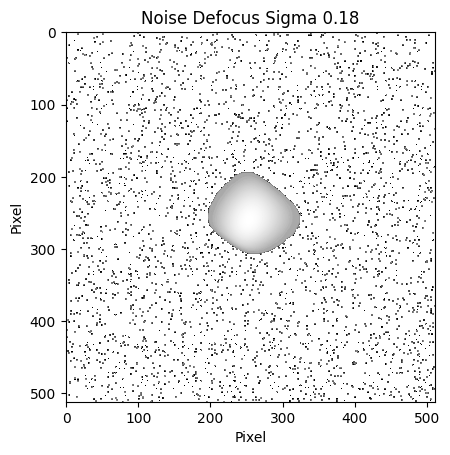

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cv2

width = 2001
height = 2001

def calculate_metrics(img1, img2):
    arr1 = np.array(img1, dtype=np.float32)
    arr2 = np.array(img2, dtype=np.float32)
    
    diff = np.abs(arr1 - arr2)
    
    mse = np.mean((arr1 - arr2) ** 2)
    mae = np.mean(np.abs(arr1 - arr2))
    
    return diff, mse, mae

def create_difference_image(diff):
    norm_diff = np.clip(diff, 0, np.max(diff))  
    # Skalieren des Bildes auf 512x512 Pixel
    resized_diff = cv2.resize(norm_diff, (512, 512), interpolation=cv2.INTER_LINEAR)
    #plt.imshow(resized_diff,cmap='cividis', norm=LogNorm()) #original
    plt.imshow(resized_diff, cmap='gray', norm=LogNorm())
    plt.title("Noise Defocus Sigma 0.18")
    plt.xlabel("Pixel")
    plt.ylabel("Pixel")
    plt.show()

def crop_center(image, crop_size):
    width, height = image.size
    left = (width - crop_size) // 2
    top = (height - crop_size) // 2
    right = (width + crop_size) // 2
    bottom = (height + crop_size) // 2
    return image.crop((left, top, right, bottom))

#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Backgroumd_with_cober\background_300_images_camera_1_with_cover\250_idx_2024-05-21 10-15-49.png' # no Laser
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Backgroumd_with_cober\background_300_images_camera_2_with_cover\250_idx_2024-05-21 10-15-58.png' # no Laser

#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_1_v3\2024-04-04 14-02-06.png' # Orginial
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_1_v3_back\1_idx_2024-04-04 14-02-06.png' # background


# Real images noise LAP
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_1_v3_crop_512\1_idx_2024-04-04 14-02-06.png' # mit Laser cropped focus
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Experimental_data\Ditzingen_Gaussian\camera_2_v3_crop_512\1_idx_2024-04-04 14-02-18.png' # mit Laser cropped defocus

#image_path1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\dataset_noise\beam_ff_noise_real\4.png'
#image_path_1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\dataset_noise\beam_nf_noise_real\4.png'




#vortex Simulation
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Vortex_Intensity\beam\1df.png'
#Noise 0.14
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_014\train\beam_ff\idx-1__img-10651.png'
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_014\train\beam_nf\idx-1__img-10651.png'
# Noise 0.16
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_016\train\beam_ff\idx-1__img-10651.png'
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_016\train\beam_nf\idx-1__img-10651.png'

#Noise 018
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_018\train\beam_ff\idx-1__img-10651.png'
#image_path1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Dataset_Vortex_simulated_Intensity_08Abb_Noise_Sigma_018\train\beam_nf\idx-1__img-10651.png'


# Test mit mean value 5 mit 0.14
#image_path1 = r'D:\Masterarbeit\Noise_Analyse\Noise_simulated_test\11df.png'


# Gaussian
# noise 0.14
#image_path1 = r'D:\Masterarbeit\Noise_Analyse\Raw_Data_Gaussian_Intensity_Beam_Noise_Sigma_014\6df.png'
# noise 0.16
#image_path1 = r'D:\Masterarbeit\Noise_Analyse\Raw_Data_Gaussian_Intensity_Beam_Noise_Sigma_016\6df.png'
# noise 0.18
image_path1 = r'D:\Masterarbeit\Noise_Analyse\Raw_Data_Gaussian_Intensity_Beam_Noise_Sigma_018\6df.png'



img1 = Image.open(image_path1).convert('L')
cropped_img1 = crop_center(img1, 512)
img2 = np.zeros((width, height), dtype=np.uint8)

diff, mse, mae = calculate_metrics(img1, img2)
print(f"MSE: {mse}")
print(f"MAE: {mae}")

create_difference_image(diff)

# Create Noise Datasets

In [ ]:
# #adding gaussian noise to the image 
# import cv2
# import numpy as np
# import cv2
# import os
# import glob
# import skimage
# import numpy as np
# import matplotlib.pyplot as plt
# import math

# def add_gaussian_noise(image_in, noise_sigma):
#     temp_image = np.float64(np.copy(image_in))
#     h = temp_image.shape[0]
#     w = temp_image.shape[1]

#     noise = np.random.randn(h, w) * noise_sigma
#     noisy_image = np.zeros(temp_image.shape, np.float64)
#     if len(temp_image.shape) == 2:
#         noisy_image = temp_image + noise
#     else:
#         noisy_image[:,:,0] = temp_image[:,:,0] + noise
#         noisy_image[:,:,1] = temp_image[:,:,1] + noise
#         noisy_image[:,:,2] = temp_image[:,:,2] + noise
#     """
#     Debugging
#     print('min,max = ', np.min(noisy_image), np.max(noisy_image))
#     print('type = ', type(noisy_image[0][0][0]))
#     """
#     return noisy_image

# # Folder with raw data
# # input_folder = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Gauusian_Intensity_Beam_Test"
# # output_folder = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Gauusian_Intensity_Beam_Noise_Sigma028"

# # Define the noise sigma
# """ Labor sigma = 0.14
#     Test_1 sigma = 0.16
#     Test_2 sigma = 0.18
#     """
# noise_sigma = 0.16

# for filename in os.listdir(input_folder):
#     if filename.endswith(".png"):
#         file_path = os.path.join(input_folder, filename)
#         img = cv2.imread(file_path)
#         noise_img = add_gaussian_noise(img, noise_sigma=noise_sigma)
#         output_file_path = os.path.join(output_folder, filename)
#         cv2.imwrite(output_file_path, noise_img)

# print("All images have been processed and saved.")

In [31]:
#adding gaussian noise to the image 
import cv2
import numpy as np
import cv2
import os
import glob
import skimage
import numpy as np
import matplotlib.pyplot as plt
import math

def add_gaussian_noise(image_in, noise_sigma):
    temp_image = np.float64(np.copy(image_in)) # convert datatype
    h = temp_image.shape[0] # höhe des Bildes
    w = temp_image.shape[1] # breite des bildes

    noise = np.random.randn(h, w) * noise_sigma # calculation mean value = 0
    # noise = 5 + noise_sigma*np.random.randn(h, w) # calculation mean value = 5
    noisy_image = np.zeros(temp_image.shape, np.float64)

    if len(temp_image.shape) == 2:
        noisy_image = temp_image + noise
    else:
        noisy_image[:,:,0] = temp_image[:,:,0] + noise
        noisy_image[:,:,1] = temp_image[:,:,1] + noise
        noisy_image[:,:,2] = temp_image[:,:,2] + noise
    """
    Debugging
    print('min,max = ', np.min(noisy_image), np.max(noisy_image))
    print('type = ', type(noisy_image[0][0][0]))
    """
    return noisy_image

# # Folder with raw data
# input_folder = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Gauusian_Intensity_Beam_Test"
# output_folder = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Gauusian_Intensity_Beam_Noise_Sigma028"

input_folder = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Datasets\Simulativ\Raw_Data_Gaussian_Intensity\beam"
output_folder = r"D:\Masterarbeit\Noise_Analyse\Raw_Data_Gaussian_Intensity_Beam_Noise_Sigma_018"


# Define the noise sigma
""" Labor sigma = 0.14
    Test_1 sigma = 0.16
    Test_2 sigma = 0.18
    """
noise_sigma = 0.18

for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
        file_path = os.path.join(input_folder, filename)
        img = cv2.imread(file_path)
        noise_img = add_gaussian_noise(img, noise_sigma=noise_sigma)
        output_file_path = os.path.join(output_folder, filename)
        print("test")
        cv2.imwrite(output_file_path, noise_img)

print("All images have been processed and saved.")

test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


KeyboardInterrupt: 